# Compare all the tree-guided MTL models on the iPCs data produced by Kathrin

## Load the model trained on dynamic features with imputed expression data

In [13]:
load("../scMTL_StemNet_imputed_dynamic_TGGLasso.RData")
print(ls())

 [1] "best.lambda"           "dyn_imp_partition"     "dyn_imp_TGL_model"    
 [4] "dyn_not_imp_partition" "dyn_not_imp_TGL_model" "epi_imp_partition"    
 [7] "epi_imp_TGL_model"     "epi_not_imp_partition" "epi_not_imp_TGL_model"
[10] "lambdas"               "mst"                   "partition"            
[13] "pred.acc"              "preprocess_partition"  "TGL.model"            


In [14]:
dyn_imp_TGL_model <- TGL.model
dyn_imp_partition <- partition

## Load the model trained on dynamic features with not-imputed expression data

In [15]:
load("../scMTL_StemNet_notImputed_dynamic_TGGLasso.RData")
print(ls())

 [1] "best.lambda"           "dyn_imp_partition"     "dyn_imp_TGL_model"    
 [4] "dyn_not_imp_partition" "dyn_not_imp_TGL_model" "epi_imp_partition"    
 [7] "epi_imp_TGL_model"     "epi_not_imp_partition" "epi_not_imp_TGL_model"
[10] "lambdas"               "mst"                   "partition"            
[13] "pred.acc"              "preprocess_partition"  "TGL.model"            


In [16]:
dyn_not_imp_TGL_model <- TGL.model
dyn_not_imp_partition <- partition

## Load the model trained on epigenetic features with imputed expression data

In [17]:
load("../scMTL_StemNet_imputed_epigenetic_TGGLasso.RData")
print(ls())

 [1] "best.lambda"           "dyn_imp_partition"     "dyn_imp_TGL_model"    
 [4] "dyn_not_imp_partition" "dyn_not_imp_TGL_model" "epi_imp_partition"    
 [7] "epi_imp_TGL_model"     "epi_not_imp_partition" "epi_not_imp_TGL_model"
[10] "lambdas"               "mst"                   "partition"            
[13] "pred.acc"              "preprocess_partition"  "TGL.model"            


In [18]:
epi_imp_TGL_model <- TGL.model
epi_imp_partition <- partition

## Load the model trained on epigenetic features with not-imputed expression data

In [19]:
load("../scMTL_StemNet_notImputed_epigenetic_TGGLasso.RData")
print(ls())

 [1] "best.lambda"           "dyn_imp_partition"     "dyn_imp_TGL_model"    
 [4] "dyn_not_imp_partition" "dyn_not_imp_TGL_model" "epi_imp_partition"    
 [7] "epi_imp_TGL_model"     "epi_not_imp_partition" "epi_not_imp_TGL_model"
[10] "lambdas"               "mst"                   "partition"            
[13] "pred.acc"              "preprocess_partition"  "TGL.model"            


In [20]:
epi_not_imp_TGL_model <- TGL.model
epi_not_imp_partition <- partition

## Load the model trained on static features with imputed expression data

In [36]:
load("../scMTL_StemNet_imputed_static_TGGLasso.RData")
print(ls())

 [1] "best.lambda"           "dyn_imp_partition"     "dyn_imp_TGL_model"    
 [4] "dyn_not_imp_partition" "dyn_not_imp_TGL_model" "epi_imp_partition"    
 [7] "epi_imp_TGL_model"     "epi_not_imp_partition" "epi_not_imp_TGL_model"
[10] "get_preds"             "lambdas"               "mst"                  
[13] "partition"             "pred.acc"              "preprocess_partition" 
[16] "sta_not_imp_partition" "sta_not_imp_TGL_model" "TGL.model"            


In [37]:
sta_imp_TGL_model <- TGL.model
sta_imp_partition <- partition

## Load the model trained on static features with not-imputed expression data

In [38]:
load("../scMTL_StemNet_notImputed_static_TGGLasso.RData")
print(ls())

 [1] "best.lambda"           "dyn_imp_partition"     "dyn_imp_TGL_model"    
 [4] "dyn_not_imp_partition" "dyn_not_imp_TGL_model" "epi_imp_partition"    
 [7] "epi_imp_TGL_model"     "epi_not_imp_partition" "epi_not_imp_TGL_model"
[10] "get_preds"             "lambdas"               "mst"                  
[13] "partition"             "pred.acc"              "preprocess_partition" 
[16] "sta_imp_partition"     "sta_imp_TGL_model"     "sta_not_imp_partition"
[19] "sta_not_imp_TGL_model" "TGL.model"            


In [39]:
sta_not_imp_TGL_model <- TGL.model
sta_not_imp_partition <- partition

## Log-transfer and normalize the partitioned data
The stored partitioned data in the above RData object is in the original space. In order to proceed with the downstream analysis, it's easier to normalize them in the same way they were done before model fitting.

In [21]:
preprocess_partition <- function(partition){
    x.train <- scale(log2(1 + partition$train$x))
    y.train <- scale(log2(1 + partition$train$y))


    x.test <- scale(log2(1 + partition$test$x), center= colMeans(log2(1 + partition$train$x)),
                    scale= apply(log2(1 + partition$train$x), 2, FUN= sd))
    y.test <- scale(log2(1 + partition$test$y), center= colMeans(log2(1 + partition$train$y)),
                    scale= apply(log2(1 + partition$train$y), 2, FUN= sd))
    return(list(x.train= x.train, y.train= y.train, x.test= x.test, y.test= y.test))
}

In [22]:
dyn_imp_partition <- preprocess_partition(dyn_imp_partition)
dyn_not_imp_partition <- preprocess_partition(dyn_not_imp_partition)
epi_imp_partition <- preprocess_partition(epi_imp_partition)
epi_not_imp_partition <- preprocess_partition(epi_not_imp_partition)
sta_imp_partition <- preprocess_partition(sta_imp_partition)
sta_not_imp_partition <- preprocess_partition(sta_not_imp_partition)

## Train and test dimenstion

In [27]:
print("dynamic")
print(paste("train: ", paste(dim(dyn_imp_partition$x.train), collapse = "x")))
print(paste("test", paste(dim(dyn_imp_partition$x.test), collapse = "x")))

print("epigenetic")
print(paste("train: ", paste(dim(epi_imp_partition$x.train), collapse = "x")))
print(paste("test", paste(dim(epi_imp_partition$x.test), collapse = "x")))

[1] "dynamic"
[1] "train:  8512x123"
[1] "test 5676x123"
[1] "epigenetic"
[1] "train:  2896x729"


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




## Cell names

In [29]:
head(colnames(epi_imp_partition$y.train))

[1] "HLC_CEL_c11_R1" "HLC_CEL_c17_R1" "HLC_CEL_c25_R1" "HLC_CEL_c35_R1"
[5] "HLC_CEL_c41_R1" "HLC_CEL_c42_R1"

## Compute the predictions on training and test data

In [30]:
get_preds <- function(partition, TGL.model){
    pred.train <- cbind(1, partition$x.train) %*% rbind(TGL.model$intercept, TGL.model$B)
    pred.test <- cbind(1, partition$x.test) %*% rbind(TGL.model$intercept, TGL.model$B)
    return(list(pred.train= pred.train, pred.test= pred.test))
}

In [41]:
dyn_imp_preds <- get_preds(dyn_imp_partition, dyn_imp_TGL_model)
dyn_not_imp_preds <- get_preds(dyn_not_imp_partition, dyn_not_imp_TGL_model)

epi_imp_preds <- get_preds(epi_imp_partition, epi_imp_TGL_model)
epi_not_imp_preds <- get_preds(epi_not_imp_partition, epi_not_imp_TGL_model)

sta_imp_preds <- get_preds(sta_imp_partition, sta_imp_TGL_model)
sta_not_imp_preds <- get_preds(sta_not_imp_partition, sta_not_imp_TGL_model)

### Plot the scatter plots for some random cells (training data)

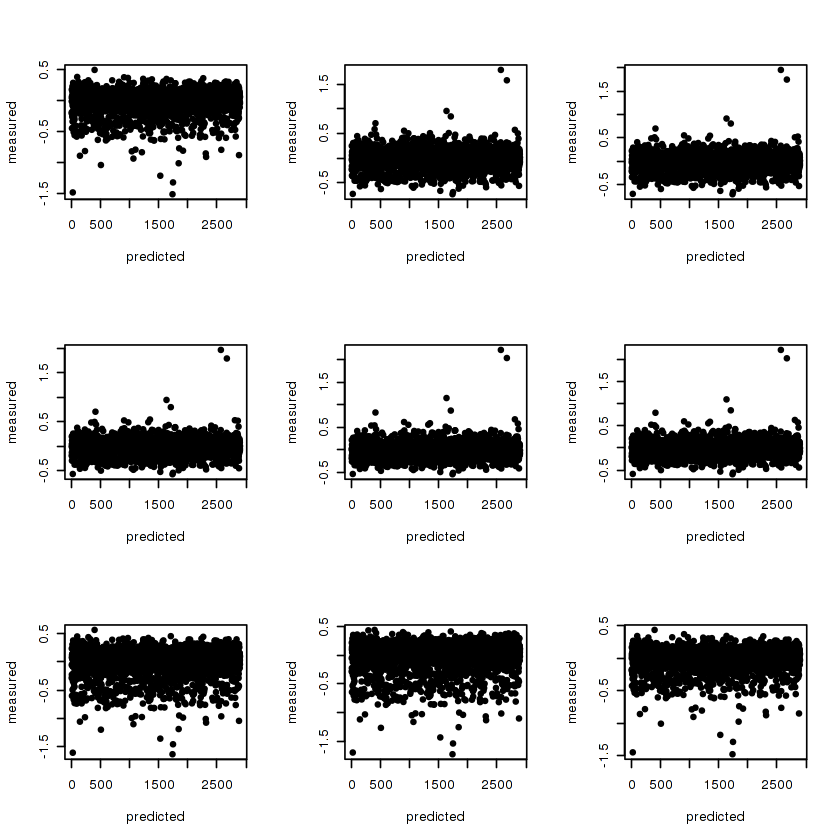

In [42]:
n <- 9
par(mfrow = c(sqrt(n), sqrt(n)))

random.idx <- sample(ncol(epi_imp_preds$pred.train))[seq(n)]
for(i in seq(n))
    plot(epi_imp_preds$pred.train[, random.idx[i]], epi_imp_preds$y.train[, random.idx[i]], pch= 20, xlab= "predicted", ylab= "measured")

### Plot the scatter plots for some random cells (test data)

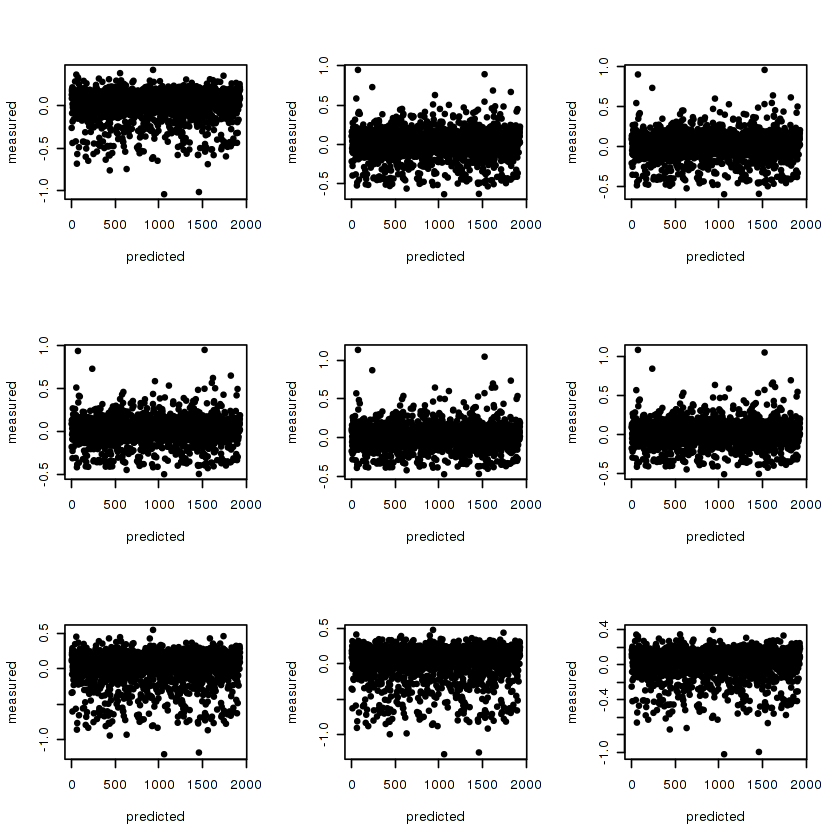

In [43]:
par(mfrow = c(sqrt(n), sqrt(n)))

#random.idx <- sample(ncol(pred.test))[seq(n)]
for(i in seq(n))
    plot(epi_imp_preds$pred.test[, random.idx[i]], epi_imp_preds$y.test[, random.idx[i]], pch= 20, xlab= "predicted", ylab= "measured")

## Compute the correlations between predicted and actual measurements of gene expression

In [46]:
options(warn= -1)
get_pred_cors <- function(preds, partition){
    # Train
    ## Method= Pearson
    cors.train.p <- sapply(seq(ncol(preds$pred.train)), function(i)
        cor(preds$pred.train[, i], partition$y.train[, i], method= "pearson"))

    ## Method= Spearman
    cors.train.s <- sapply(seq(ncol(preds$pred.train)), function(i)
        cor(preds$pred.train[, i], partition$y.train[, i], method= "spearman"))

    # Test
    ## Method= Pearson
    cors.test.p <- sapply(seq(ncol(preds$pred.test)), function(i)
        cor(preds$pred.test[, i], partition$y.test[, i], method= "pearson"))

    ## Method= Spearman
    cors.test.s <- sapply(seq(ncol(preds$pred.test)), function(i)
        cor(preds$pred.test[, i], partition$y.test[, i], method= "spearman"))
                          
    return(list(cors.train.p= cors.train.p, cors.train.s= cors.train.s, cors.test.p= cors.test.p, cors.test.s= cors.test.s))
}

In [48]:
dyn_imp_cors <- get_pred_cors(dyn_imp_preds, dyn_imp_partition)
dyn_not_imp_cors <- get_pred_cors(dyn_not_imp_preds, dyn_not_imp_partition)

epi_imp_cors <- get_pred_cors(epi_imp_preds, epi_imp_partition)
epi_not_imp_cors <- get_pred_cors(epi_not_imp_preds, epi_not_imp_partition)

sta_imp_cors <- get_pred_cors(sta_imp_preds, sta_imp_partition)
sta_not_imp_cors <- get_pred_cors(sta_not_imp_preds, sta_not_imp_partition)

In [52]:
get_cor_df <- function(cors, feature_type, imputed){
    df <- data.frame(val= cors$cors.test.p, feature= feature_type, imputation_status= imputed,
                     cor_method= "Pearson", data_partition= "test")
    df <- rbind(df, data.frame(val= cors$cors.test.s, feature= feature_type, imputation_status= imputed,
                     cor_method= "Spearman", data_partition= "test"))
    df <- rbind(df, data.frame(val= cors$cors.train.p, feature= feature_type, imputation_status= imputed,
                     cor_method= "Pearson", data_partition= "train"))
    df <- rbind(df, data.frame(val= cors$cors.train.s, feature= feature_type, imputation_status= imputed,
                     cor_method= "Spearman", data_partition= "train"))
    return(df)
}

In [60]:
dyn_imp_df <- get_cor_df(dyn_imp_cors, "dynamic", "imputed")
dyn_not_imp_df <- get_cor_df(dyn_not_imp_cors, "dynamic", "notImputed")

epi_imp_df <- get_cor_df(epi_imp_cors, "epigenetic", "imputed")
epi_not_imp_df <- get_cor_df(epi_not_imp_cors, "epigenetic", "notImputed")

sta_imp_df <- get_cor_df(sta_imp_cors, "static", "imputed")
sta_not_imp_df <- get_cor_df(sta_not_imp_cors, "static", "notImputed")

## bind all dataframes together
df <- rbind(dyn_imp_df, dyn_not_imp_df, epi_imp_df, epi_not_imp_df, sta_imp_df, sta_not_imp_df)
head(df)

val,feature,imputation_status,cor_method,data_partition
0.4456535,dynamic,imputed,Pearson,test
0.4502344,dynamic,imputed,Pearson,test
0.4372021,dynamic,imputed,Pearson,test
0.4589566,dynamic,imputed,Pearson,test
0.4357193,dynamic,imputed,Pearson,test
0.4464748,dynamic,imputed,Pearson,test


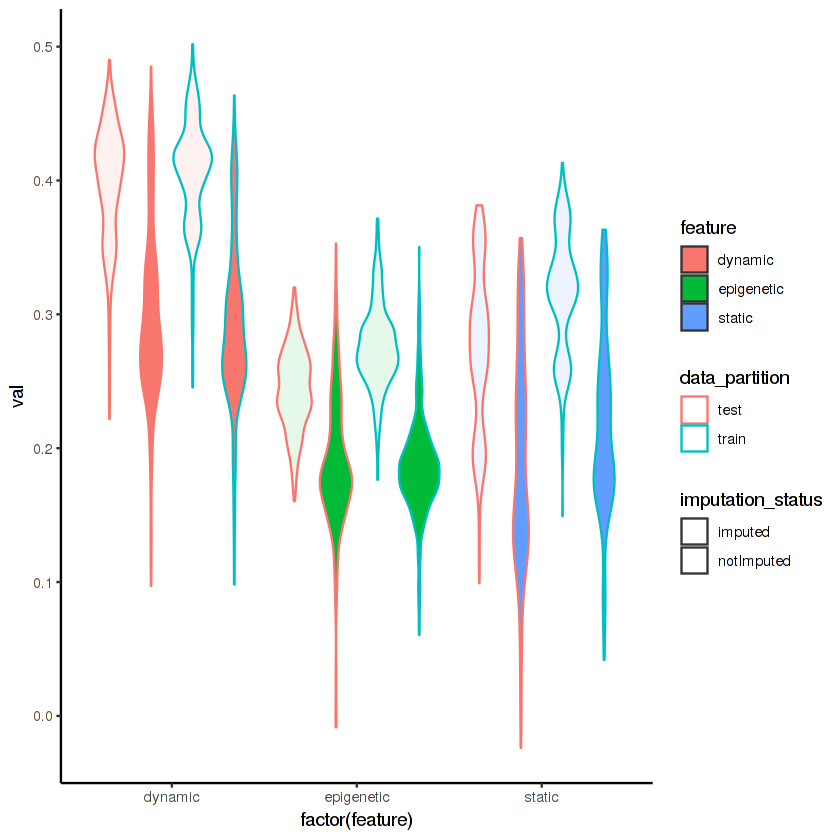

In [76]:
library(ggplot2, verbose = 0)
ggplot(df, aes(factor(feature), val)) + geom_violin(aes(fill= feature, color= data_partition, alpha= imputation_status)) + theme_classic()
    #geom_jitter(shape=16, position=position_jitter(0.8))